In [2]:
import torch 
import numpy as np
np.set_printoptions(precision=3)
a = [1,2,3]
b = np.array([4, 5, 6], dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)
print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [3]:
# to change datatype
t_a_new = t_a.to(torch.int64)
print(t_a_new.dtype)

torch.int64


In [5]:
# changing the shape of a tensor
t = torch.rand(3,5)
print(t)
t_tr = torch.transpose(t, 0, 1)
print(t_tr)

tensor([[0.8478, 0.3464, 0.2230, 0.1645, 0.5368],
        [0.6574, 0.7605, 0.9190, 0.6692, 0.8229],
        [0.7341, 0.6361, 0.6827, 0.8256, 0.6275]])
tensor([[0.8478, 0.6574, 0.7341],
        [0.3464, 0.7605, 0.6361],
        [0.2230, 0.9190, 0.6827],
        [0.1645, 0.6692, 0.8256],
        [0.5368, 0.8229, 0.6275]])


In [14]:
# remove unnecessary dims 
t = torch.zeros(1, 2, 1, 4, 1)
print(t)
print(t.shape)
t_sqz = torch.squeeze(t, 2)
print(t_sqz)
print(t_sqz.shape)

tensor([[[[[0.],
           [0.],
           [0.],
           [0.]]],


         [[[0.],
           [0.],
           [0.],
           [0.]]]]])
torch.Size([1, 2, 1, 4, 1])
tensor([[[[0.],
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          [0.]]]])
torch.Size([1, 2, 4, 1])


In [20]:
torch.manual_seed(1)
t1 = 2 * torch.rand(5, 2) - 1
print("t1=",t1)
t2 = torch.normal(mean=0, std=1, size=(5,2))
print("t2=",t2)
# Element wise product
t3 = torch.multiply(t1, t2) 
print("t3=", t3)
# mean about each column
t4 = torch.mean(t1, axis=0)
print("t4=", t4)
# matrix multiply
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))
print("t5=", t5)

t1= tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])
t2= tensor([[ 0.8590,  0.7056],
        [-0.3406, -1.2720],
        [-1.1948,  0.0250],
        [-0.7627,  1.3969],
        [-0.3245,  0.2879]])
t3= tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])
t4= tensor([-0.1373,  0.2028])
t5= tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


In [22]:
# split a tensor
t = torch.rand(6)
print(t)
t_splits = torch.chunk(t, 3)
[item.numpy() for item in t_splits]

tensor([0.9391, 0.4167, 0.7140, 0.2676, 0.9906, 0.2885])


[array([0.939, 0.417], dtype=float32),
 array([0.714, 0.268], dtype=float32),
 array([0.991, 0.288], dtype=float32)]

In [23]:
# concatenate tensor 
A = torch.ones(3) 
B = torch.zeros(2) 
C = torch.cat([A, B], axis=0)
print(C)

tensor([1., 1., 1., 0., 0.])


In [24]:
A = torch.ones(3) 
B = torch.zeros(3) 
S = torch.stack([A, B], axis=1)
print(S)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


In [26]:
# using DataLoader
from torch.utils.data import DataLoader
t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)
for item in data_loader: 
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [32]:
# batch size of 3 
data_loader = DataLoader(t, batch_size=3, drop_last=False)
for i, batch in enumerate(data_loader, 1): 
    print(f'batch{i}:', batch)

batch1: tensor([0., 1., 2.])
batch2: tensor([3., 4., 5.])


In [33]:
# combine a dataset where t_x holds features and t_y holds labels
torch.manual_seed(1)
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)
print(t_x)
print(t_y)

tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999],
        [0.3971, 0.7544, 0.5695],
        [0.4388, 0.6387, 0.5247]])
tensor([0, 1, 2, 3])


In [34]:
from torch.utils.data import Dataset 
class JointDataset(Dataset):
    def __init__(self, x, y): 
        self.x = x 
        self.y = y 
    
    def __len__(self): 
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

joint_dataset = JointDataset(t_x, t_y)
# print
for example in joint_dataset: 
    print('x:', example[0], 'y:', example[1])

x: tensor([0.7576, 0.2793, 0.4031]) y: tensor(0)
x: tensor([0.7347, 0.0293, 0.7999]) y: tensor(1)
x: tensor([0.3971, 0.7544, 0.5695]) y: tensor(2)
x: tensor([0.4388, 0.6387, 0.5247]) y: tensor(3)


In [35]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)
# each batch contains two data records (x) and corresponding labels (y)
for i, batch in enumerate(data_loader, 1): 
    print(f'batch {i}:', 'x:', batch[0], '\n y:', batch[1])

batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
 y: tensor([3, 2])
batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
 y: tensor([0, 1])


In [37]:
# if training for multiple epochs need to shuffle and iterate over dataset
for epoch in range(2): 
    print(f'epoch {epoch + 1}')
    for i, batch in enumerate(data_loader, 1): 
        print(f'batch {i}:', 'x:', batch[0], '\n y:', batch[1])

epoch 1
batch 1: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.3971, 0.7544, 0.5695]]) 
 y: tensor([1, 2])
batch 2: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.7576, 0.2793, 0.4031]]) 
 y: tensor([3, 0])
epoch 2
batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
 y: tensor([2, 0])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
 y: tensor([1, 3])


In [1]:
# read local files 
import pathlib
imgdir_path = pathlib.Path('cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*jpg')])
print(file_list)

['cat_dog_images/cat-01.jpg', 'cat_dog_images/cat-02.jpg', 'cat_dog_images/cat-03.jpg', 'cat_dog_images/dog-01.jpg', 'cat_dog_images/dog-02.jpg', 'cat_dog_images/dog-03.jpg']


Image shape: (900, 1200, 3)
Image shape: (900, 1200, 3)
Image shape: (900, 742, 3)
Image shape: (800, 1200, 3)
Image shape: (800, 1200, 3)
Image shape: (900, 1200, 3)


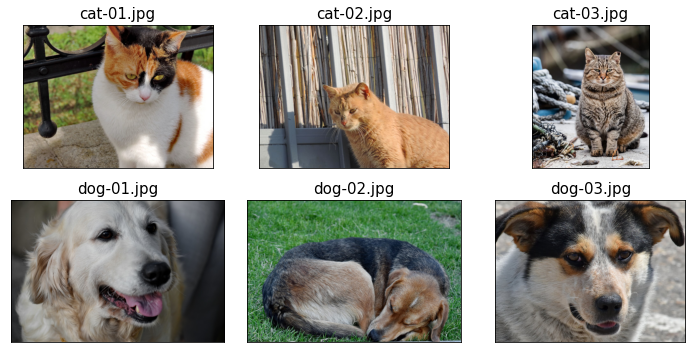

In [7]:
import matplotlib.pyplot as plt 
import numpy as np
import os 
from PIL import Image
fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list): 
    img = Image.open(file)
    print('Image shape:', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i + 1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
plt.tight_layout()
plt.show()

In [9]:
# extract labels, 1 for dog and 0 for cat
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [10]:
# let's combine the file list and labels and resize images to 80x120
import torchvision.transforms as transforms 
img_height, img_width = 80, 120
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((img_height, img_width))])


In [12]:
from torch.utils.data import Dataset 
class ImageDataset(Dataset): 
    def __init__(self, file_list, labels, transform=None): 
        self.file_list = file_list 
        self.labels = labels 
        self.transform = transform 

    def __getitem__(self, index): 
        img = Image.open(self.file_list[index]) 
        if self.transform is not None: 
            img = self.transform(img)
            label = self.labels[index]
            return img, label 

    def __len__(self): 
        return len(self.labels)

image_dataset = ImageDataset(file_list, labels, transform)


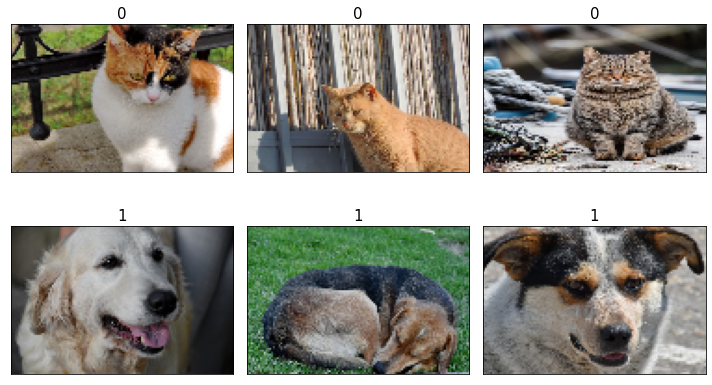

In [13]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset): 
    ax = fig.add_subplot(2, 3, i + 1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=15)

plt.tight_layout()
plt.show()

In [15]:
import torchvision

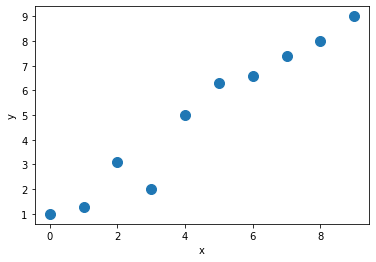

In [24]:
# using the nn module 
# create toy dataset in numpy to solve regression 
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0], dtype='float32')
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [25]:
# standardize data
import torch
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset 
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)

y_train = torch.from_numpy(y_train).float()

train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)


In [26]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)
def model(xb):
    return xb @ weight + bias
def loss_fn(input, target): 
    return (input - target).pow(2).mean()

In [28]:
learning_rate = 0.001 
num_epochs = 200 
log_epochs = 10 
for epoch in range(num_epochs): 
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
    with torch.no_grad():
        weight -= weight.grad * learning_rate 
        bias -= bias.grad * learning_rate 
        weight.grad.zero_()
        bias.grad.zero_()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item():4f}')

Epoch 0 Loss 5.500806
Epoch 10 Loss 31.242846
Epoch 20 Loss 27.527143
Epoch 30 Loss 0.960142
Epoch 40 Loss 3.639144
Epoch 50 Loss 5.998418
Epoch 60 Loss 3.810439
Epoch 70 Loss 1.591426
Epoch 80 Loss 0.610408
Epoch 90 Loss 1.562749
Epoch 100 Loss 0.255039
Epoch 110 Loss 0.691695
Epoch 120 Loss 0.263033
Epoch 130 Loss 0.158890
Epoch 140 Loss 0.598974
Epoch 150 Loss 0.063437
Epoch 160 Loss 0.115986
Epoch 170 Loss 0.346806
Epoch 180 Loss 0.325002
Epoch 190 Loss 0.095424


In [30]:
print('Final parameters:', weight.item(), bias.item())

Final parameters: 2.670930862426758 4.88258695602417


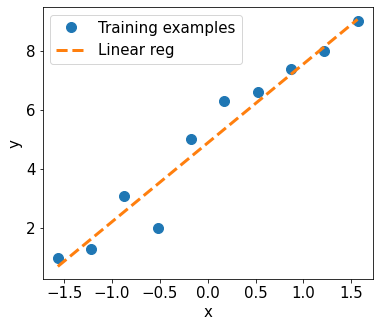

In [33]:
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train))/np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()

fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(1, 2, 1) 
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear reg'], fontsize=15)
ax.set_xlabel('x', size=15) 
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [34]:
# using torch.nn and torch.optim modules 
import torch.nn as nn 
loss_fn = nn.MSELoss(reduction='mean')
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size) 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [35]:
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl: 
        # Generate predictions
        pred = model(x_batch)[:, 0]
        # Calculate loss 
        loss = loss_fn(pred, y_batch)
        # Compute gradients
        loss.backward()
        # Update parameters using gradients
        optimizer.step()
        # Reset the gradients to zero 
        optimizer.zero_grad()
    if epoch % log_epochs == 0: 
        print(f'Epoch {epoch} Loss {loss.item():.4f}')


Epoch 0 Loss 38.7543
Epoch 10 Loss 2.0970
Epoch 20 Loss 30.4347
Epoch 30 Loss 0.7147
Epoch 40 Loss 13.1391
Epoch 50 Loss 6.6279
Epoch 60 Loss 4.2347
Epoch 70 Loss 4.7506
Epoch 80 Loss 1.1948
Epoch 90 Loss 1.4845
Epoch 100 Loss 0.2175
Epoch 110 Loss 1.0143
Epoch 120 Loss 0.1618
Epoch 130 Loss 0.7065
Epoch 140 Loss 1.4043
Epoch 150 Loss 0.0693
Epoch 160 Loss 0.2174
Epoch 170 Loss 0.0928
Epoch 180 Loss 0.0979
Epoch 190 Loss 0.0005


In [36]:
print('Final parameters', model.weight.item(), model.bias.item())

Final parameters 2.6650238037109375 4.877845287322998


In [40]:
# building multilayer perceptron for classifying flowers